In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [7]:
df['Classes']= np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
X=df.drop(['FWI'],axis=1)
y=df[['FWI']]

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [14]:
# train test split
from sklearn.model_selection import train_test_split


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [16]:
X_test.shape

(81, 11)

In [17]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616,0.260966
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497,-0.419498
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682,-0.216375
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668,-0.057620
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922,0.271324
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266,0.222615
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390,-0.046399
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342,0.304554
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711,0.127509
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000,0.197291


<Axes: >

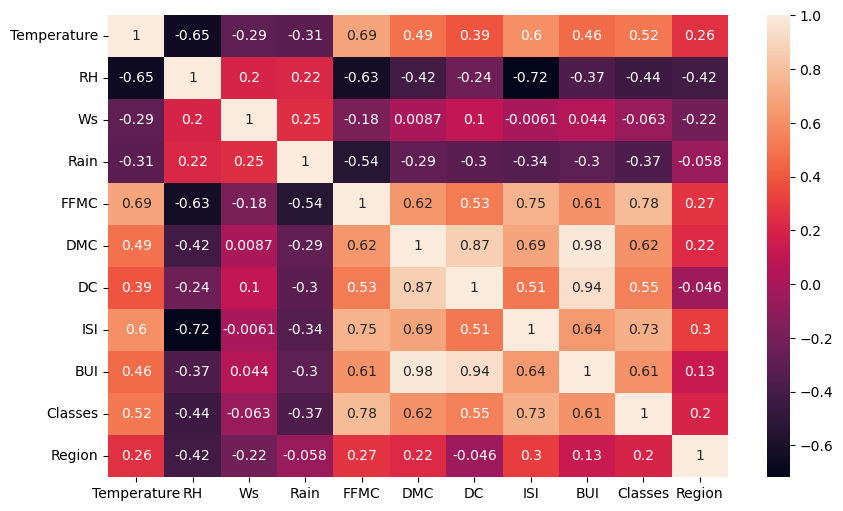

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.corr(),annot=True)

In [19]:
df.corr().columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
range(len(df.corr().columns))

range(0, 12)

In [21]:
for i in range(0,12):
    for j in range(i):
        print(i)
        print(j)
        print('\n')

1
0


2
0


2
1


3
0


3
1


3
2


4
0


4
1


4
2


4
3


5
0


5
1


5
2


5
3


5
4


6
0


6
1


6
2


6
3


6
4


6
5


7
0


7
1


7
2


7
3


7
4


7
5


7
6


8
0


8
1


8
2


8
3


8
4


8
5


8
6


8
7


9
0


9
1


9
2


9
3


9
4


9
5


9
6


9
7


9
8


10
0


10
1


10
2


10
3


10
4


10
5


10
6


10
7


10
8


10
9


11
0


11
1


11
2


11
3


11
4


11
5


11
6


11
7


11
8


11
9


11
10




In [33]:
# 00 
# 11 12

In [ ]:
range(1)

In [ ]:
range(0, 1)

In [23]:
# feature selection?

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

<Axes: >

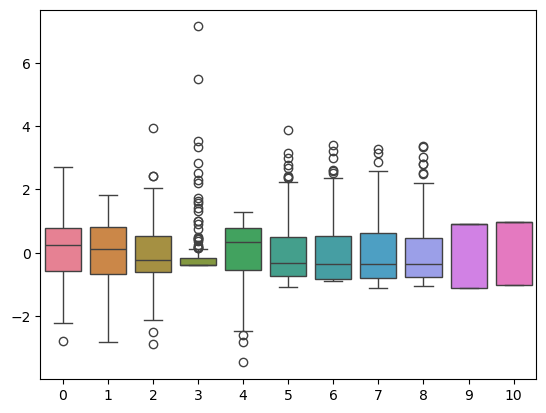

In [35]:
sns.boxplot(X_train)

In [37]:
# Linear regression

In [51]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [53]:
regression.fit(X_train,y_train)

LinearRegression()

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [59]:
y_pred=regression.predict(X_test)

In [65]:
mae=mean_absolute_error(y_test,y_pred)
mae

1.1332524365753736

In [67]:
score=r2_score(y_test,y_pred)
score

0.9535651457104818

In [81]:
# Ridge regression
# lasso regression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lasso=Lasso()
ridge=Ridge()
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
ridge_pred=ridge.predict(X_test)
lasso_score=r2_score(y_test,lasso_pred)
ridge_score=r2_score(y_test,ridge_pred)
lasso_mae=mean_absolute_error(y_test,lasso_pred)
ridge_mae=mean_absolute_error(y_test,ridge_pred)

print(lasso_score)
print(ridge_score)

print(lasso_mae)
print(ridge_mae)


0.9728751156661042
0.9539328523564419
0.9092470566324546
1.1243376775293594


elsatic score 0.9277734394155606
mean absolute error 1.4424296931130927


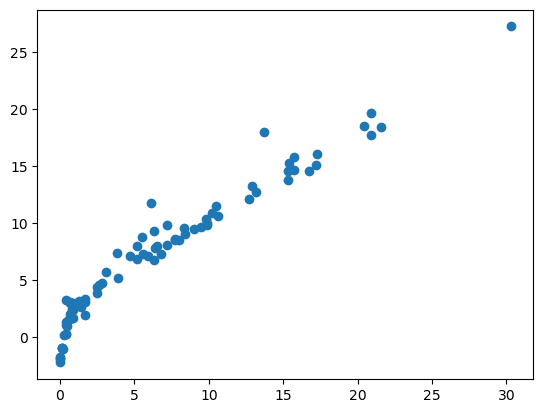

In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elastic=ElasticNet()
elastic.fit(X_train,y_train)
elastic_pred=elastic.predict(X_test)
elastic_mae=mean_absolute_error(y_test,elastic_pred)
elastic_score=r2_score(y_test,elastic_pred)
print('elsatic score',elastic_score)
print('mean absolute error',elastic_mae)
plt.scatter(y_test,elastic_pred)

In [91]:
from sklearn.linear_model import LassoCV

In [95]:
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(X_train,y_train)

C:\Users\40000433\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5)

In [99]:
lasso_cv.predict(X_test)

array([ 9.14373415,  8.08993361, -0.70461978,  5.89736212,  7.31505412,
        1.39450551,  2.26813614,  8.18268297,  1.82489794,  3.40113302,
       -0.07743152,  9.39363663, 10.59150646, 18.92541501, 21.82209473,
        1.33208114,  1.34996256, -1.56154572,  7.52279906,  3.14500738,
        1.49904559, -0.42639902,  6.79709498, -0.66126465, 23.97337556,
        5.24764693,  6.274416  , 11.17147287, -1.64482488, 11.04407442,
        7.069626  , -0.83219038, 11.5489126 , 17.19030697,  1.22033802,
        0.55806163,  1.59660989,  6.61639495, -1.25949511, -1.16186805,
        7.56014164,  1.5076382 ,  9.1935283 , -1.79527611, 17.32952781,
        8.82273087,  8.96686272,  0.61337473, 14.41926323,  0.50556919,
       33.25329871,  5.87745865, 19.47884858, 22.98155291, 16.22268735,
       19.17935722,  0.59487663,  9.91151974,  3.95033482, 16.58105479,
        5.57831397,  0.72631886, -1.00765661, 25.00527198,  3.44802143,
        1.01813419, 10.72224075,  7.57602562, 11.50736348, -1.70

In [101]:
lasso_cv.alpha_

0.04091012896621466

In [105]:
lasso_cv.alphas_

array([7.14916122, 6.66733168, 6.21797584, 5.79890508, 5.40807829,
       5.04359191, 4.7036707 , 4.38665903, 4.0910129 , 3.81529232,
       3.55815439, 3.31834669, 3.09470123, 2.88612872, 2.69161331,
       2.51020758, 2.34102799, 2.18325054, 2.03610676, 1.89887998,
       1.77090182, 1.65154897, 1.54024009, 1.43643307, 1.33962229,
       1.24933623, 1.16513515, 1.08660894, 1.01337513, 0.94507704,
       0.88138201, 0.82197981, 0.76658112, 0.71491612, 0.66673317,
       0.62179758, 0.57989051, 0.54080783, 0.50435919, 0.47036707,
       0.4386659 , 0.40910129, 0.38152923, 0.35581544, 0.33183467,
       0.30947012, 0.28861287, 0.26916133, 0.25102076, 0.2341028 ,
       0.21832505, 0.20361068, 0.189888  , 0.17709018, 0.1651549 ,
       0.15402401, 0.14364331, 0.13396223, 0.12493362, 0.11651351,
       0.10866089, 0.10133751, 0.0945077 , 0.0881382 , 0.08219798,
       0.07665811, 0.07149161, 0.06667332, 0.06217976, 0.05798905,
       0.05408078, 0.05043592, 0.04703671, 0.04386659, 0.04091